# Assemblage

The `Assemblage` represents all of the things that can potentially be discovered within an `Area`. These are most commonly going to be artifacts represented as points, but can theoretically be other shapes as well. The `Assemblage` must lie within the `Area`, so an `Area` object is a required parameter of the `Assemblage` creation methods.

An `Assemblage` is made from a list of `Layer` objects, so most of the heavy lifting is done by creating each `Layer`. We will walk through `Layer` creation methods first, then we will put them together in an `Assemblage`.

## Creating a `Layer`

A `Layer` is intended to be a group of artifacts or other features that share `time_penalty` and `ideal_obs_rate` parameters. More practically, you can think of a `Layer` standing in for a type of artifact. For example, you might expect those parameters to be the same for any Iron Age ceramics, so you can put all of the Iron Age ceramics into the same `Layer`.

Each element of the `Layer` (i.e., each individual artifact) is a `Feature` object. Most of the time it will make more sense to use `Layer` methods to create many `Feature` objects at the same time, but it is possible to create the `Feature` objects one-by-one and assembling them into a `Layer`.

### From a list of `Feature` objects

To create a `Feature`, we need a `shapely` object, so let's create a few simple points.

In [1]:
from shapely.geometry import Point
import prospect
from scipy.stats import beta

pt1 = Point(10, 10)
ft1 = prospect.Feature(
    name="feature1", 
    layer_name="demo_layer", 
    shape=pt1,
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

pt2 = Point(50, 50)
ft2 = prospect.Feature(
    name="feature2",
    layer_name="demo_layer", 
    shape=pt2,
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

pt3 = Point(90, 90)
ft3 = prospect.Feature(
    name="feature3",
    layer_name="demo_layer",
    shape=pt3,
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

```{note}
Notice that we kept the `time_penalty` and `ideal_obs_rate` parameters constant. It is not *required* that all members of a `Layer` have identical values for these parameters, but it is probably a good idea. If you need to use different values, it is probably best to use one `Layer` per unique set of parameters.
```

Now let's put our `Feature` objects into a `Layer`. The `Layer` constructor will check and ensure that the `Feature` objects are located within the `Area` boundaries, so you must pass an `Area` when creating a `Layer`.

```{note}
Currently this spatial rule is only enforced if all of the elements in `input_features` are `Point` objects. It is my hope to include `LineString` and `Polygon` `Feature` objects in this "clipping" operation in the future.
```

In [2]:
demo_area = prospect.Area.from_area_value(
    name='demo_area', 
    value=10000
)

In [3]:
layer_from_list = prospect.Layer(
    name='demo_layer', 
    area=demo_area,
    assemblage_name='demo_assemblage',
    input_features=[ft1, ft2, ft3]
)

In [4]:
type(layer_from_list)

prospect.layer.Layer

In [5]:
layer_from_list.df

,feature_name,layer_name,shape,time_penalty,ideal_obs_rate
0,feature1,demo_layer,POINT (10.00000 10.00000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
1,feature2,demo_layer,POINT (50.00000 50.00000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
2,feature3,demo_layer,POINT (90.00000 90.00000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...


In [6]:
type(layer_from_list.df)

geopandas.geodataframe.GeoDataFrame

We can use the plotting functionality from `geopandas` to visualize the `Layer` members within the `Area`.

<AxesSubplot:>

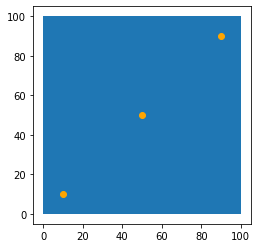

In [7]:
layer_from_list.df.plot(ax=demo_area.df.plot(), color="orange")

### From a shapefile

The `from_shapefile()` method is useful for reading in existing datasets as `Layer` objects. These could be data from a completed field survey or maybe data designed to test some custom question.

In [8]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_shp = prospect.Layer.from_shapefile(
    path="./data/demo_layer.shp",
    name="demo_layer_from_shp",
    area=area_from_shp,
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

In [9]:
layer_from_shp.df

,feature_name,layer_name,shape,time_penalty,ideal_obs_rate
0,demo_layer_from_shp_0,demo_layer_from_shp,POINT (533579.123 4388848.757),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
1,demo_layer_from_shp_1,demo_layer_from_shp,POINT (533638.844 4388883.594),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
2,demo_layer_from_shp_2,demo_layer_from_shp,POINT (533621.702 4388842.121),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
3,demo_layer_from_shp_3,demo_layer_from_shp,POINT (533701.882 4388861.475),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
4,demo_layer_from_shp_4,demo_layer_from_shp,POINT (533669.810 4388763.047),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
5,demo_layer_from_shp_5,demo_layer_from_shp,POINT (533575.252 4388787.930),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
6,demo_layer_from_shp_6,demo_layer_from_shp,POINT (533771.556 4388874.194),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
7,demo_layer_from_shp_7,demo_layer_from_shp,POINT (533717.918 4388839.910),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...


Let's plot the resulting `Layer`.

<AxesSubplot:>

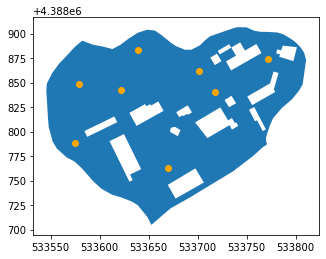

In [10]:
layer_from_shp.df.plot(ax=area_from_shp.df.plot(), color="orange")

### From pseudorandom points

To very quickly create a `Layer` with a specific number of points, you can use the `from_pseudorandom_points()` method. This method uses `numpy` to draw $n$ random values for coordinates for `Point` objects.

In [11]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_pseudo_rand = prospect.Layer.from_pseudorandom_points(
    n=100,
    name="demo_layer_from_pseu_rand",
    area=area_from_shp,
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

In [12]:
layer_from_pseudo_rand.df.shape

(100, 5)

<AxesSubplot:>

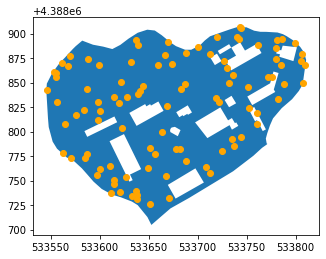

In [13]:
layer_from_pseudo_rand.df.plot(ax=area_from_shp.df.plot(), color='orange')

### From point processes

`prospect` offers methods for creating `Layer` objects using existing point pattern types: Poisson, Thomas, and Matern.

```{caution}
For all of these point pattern types, the generated points are *not* guaranteed to fall within the given `Area`, only within its bounding box. The generated `GeoDataFrame` of points, `df`, is clipped by the actual `Area` bounds *after* they are generated, which can result in fewer points than expected. If you need to examine what has been clipped, all original points will remain in the `input_features` attribute.
```

#### Poisson

A Poisson point process is usually said to be more "purely" random than most random number generators (like the one used in `from_pseudorandom_points()`)

The rate (usually called "lambda") of the Poisson point process represents the number of events per unit of area per unit of time across some theoretical space of which our `Area` is some subset. In this case, we only have one unit of time, so the rate really represents a theoretical number of events per unit area. For example, if the specified rate is 5, in any 1x1 square, the number of points observed will be drawn randomly from a Poisson distribution with a shape parameter of 5. In practical terms, this means that over many 1x1 areas (or many observations of the same area), the mean number of points observed in that area will approximate 5.

In [14]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_poisson = prospect.Layer.from_poisson_points(
    rate=0.005,
    name="demo_layer_from_poisson", 
    area=area_from_shp, 
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

In [15]:
layer_from_poisson.df.shape

(177, 5)

<AxesSubplot:>

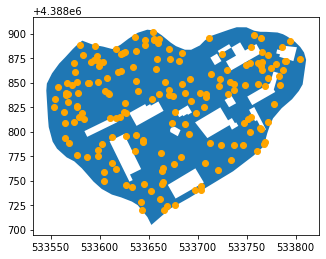

In [16]:
layer_from_poisson.df.plot(ax=area_from_shp.df.plot(), color='orange')

#### Thomas

A Thomas point process is a two-stage Poisson process. It has a Poisson number of clusters, each with a Poisson number of points distributed with an isotropic Gaussian distribution of a given variance. The points that are used to define the parent clusters are *not* represented in the output.

```{tip}
This is an excellent way to generate artifact clusters.
```

In [17]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_thomas = prospect.Layer.from_thomas_points(
    parent_rate=0.001,
    child_rate=10,
    gauss_var=5,
    name="demo_layer_from_thomas", 
    area=area_from_shp, 
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

In [18]:
layer_from_thomas.df.shape

(279, 5)

<AxesSubplot:>

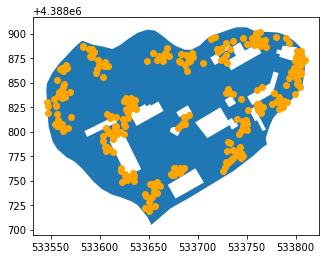

In [19]:
layer_from_thomas.df.plot(ax=area_from_shp.df.plot(), color='orange')

#### Matern

The Matern process is similar to the Thomas point process. It has a Poisson number of parent clusters like the Thomas process, but in this case, each parent cluster has a Poisson number of points distributed uniformly across a disk of a given radius.

```{tip}
This is an excellent method for generating circular clusters of artifacts.
```

In [20]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_matern = prospect.Layer.from_matern_points(
    parent_rate=0.001,
    child_rate=10,
    radius=5,
    name="demo_layer_from_matern", 
    area=area_from_shp, 
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

In [21]:
layer_from_matern.df.shape

(303, 5)

<AxesSubplot:>

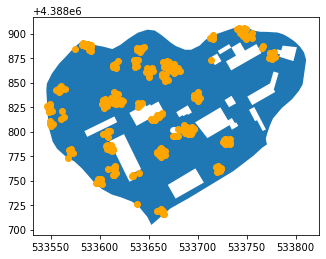

In [22]:
layer_from_matern.df.plot(ax=area_from_shp.df.plot(), color='orange')


```{admonition} COMING SOON: from_rectangles()
:class: tip
In the future I plan to implement a convenience method for placing rectangles (or other polygon shapes) randomly within an `Area` using a Poisson point process to determine the centerpoints of the polygons.
```

## `time_penalty` parameter

The time penalty is meant to reflect the amount of time added to the search time to record any particular `Feature` object when it is found.

This parameter requires some knowledge or intuition about the recording methods that are (or could be) used in the field. For example, if special labeling or curation procedures are to be applied to some class of artifacts, that might justify a greater time penalty for that `Layer` of artifacts. Recall though that this parameter is applied to all `Features` that make up a `Layer`, so take care to include only `Feature` objects for which this `time_penalty` value holds.

Let's revisit the last example we saw. Here, we specify the `time_penalty` parameter of the `Layer` as a truncated normal distribution with a mean of 10, a standard deviation of 7, lower bound at 0, and upper bound at 50.

In [23]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_matern = prospect.Layer.from_matern_points(
    parent_rate=0.001,
    child_rate=10,
    radius=5,
    name="demo_layer_from_matern", 
    area=area_from_shp, 
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

We can check that the `time_penalty` column of the `<Layer>.df` attribute is indeed a `scipy` distribution.

In [24]:
layer_from_matern.df['time_penalty'].head()

0    <scipy.stats._distn_infrastructure.rv_frozen o...
1    <scipy.stats._distn_infrastructure.rv_frozen o...
2    <scipy.stats._distn_infrastructure.rv_frozen o...
3    <scipy.stats._distn_infrastructure.rv_frozen o...
4    <scipy.stats._distn_infrastructure.rv_frozen o...
Name: time_penalty, dtype: object

## `ideal_obs_rate` parameter

Of all the `prospect` parameters, the ideal observation rate is perhaps the most difficult to define. It represents the frequency with which an artifact or feature will be recorded, assuming the following ideal conditions: 
- It lies inside or intersects the `Coverage`
- Surface visibility is 100%
- The surveyor's skill is 1.0

These assumptions are important to consider further. The ideal observation rate is specified here solely as a property of the materials (i.e., artifacts or features) themselves, unrelated to the distance from the observer, surface visibility, or surveyor skill. These other factors are all accounted for in other parts of the simulation, so users should avoid replicating that uncertainty here. For most `Layer` objects, this value should probably be 1.0 or close to 1.0, but there are some scenarios where you might want to consider an alternate value. For instance:
- If the `Layer` represents extremely small artifacts (e.g., beads, tiny stone flakes) that are hard to observe even in the best conditions.
- If the `Layer` represents artifacts or features that are difficult to differentiate from the surface "background" in a particular context. For example, in a gravelly area, ceramic sherds can be difficult to differentiate from rocks. A major caveat here is that this "background noise" is sometimes considered in surface visibility estimations, so the user should take care not to duplicate that uncertainty if it is already accounted for in the `Area` building block.

Let's look at the `Layer` from above once again.

In [25]:
area_from_shp = prospect.Area.from_shapefile(
    name="area_shp", 
    path="./data/demo_area.shp"
)

layer_from_matern = prospect.Layer.from_matern_points(
    parent_rate=0.001,
    child_rate=10,
    radius=5,
    name="demo_layer_from_matern", 
    area=area_from_shp, 
    assemblage_name="demo_assemblage",
    time_penalty=prospect.utils.truncnorm(mean=10, sd=7, lower=0, upper=50),
    ideal_obs_rate=beta(9, 1)
)

By setting the `ideal_obs_rate` parameter to a Beta distribution (`scipy.stats.beta(9, 1)`), we are saying, for example, that if there were 10 artifacts of this type in an area, even a highly-skilled surveyor in perfect visibility conditions would only discover 9 of them most of the time.

## Creating an `Assemblage` from `Layer` objects

An `Assemblage` is merely a collection of `Layer` objects. You can pass your previously-created `Layer` objects in a list to the `Assemblage` constructor. We'll pass it all of the `Layer` objects we created above.

In [26]:
demo_assemblage = prospect.Assemblage(
    name="demo_assemblage",
    area_name="area_shp",
    layer_list=[
        layer_from_list,
        layer_from_shp,
        layer_from_pseudo_rand,
        layer_from_poisson,
        layer_from_thomas,
        layer_from_matern
    ]
)

We can see that all of the `Feature` objects from the various `Layer` objects are part of one `Assemblage` object.

In [27]:
demo_assemblage.df.head(10)

,feature_name,layer_name,shape,time_penalty,ideal_obs_rate
0,feature1,demo_layer,POINT (10.000 10.000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
1,feature2,demo_layer,POINT (50.000 50.000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
2,feature3,demo_layer,POINT (90.000 90.000),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
3,demo_layer_from_shp_0,demo_layer_from_shp,POINT (533579.123 4388848.757),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
4,demo_layer_from_shp_1,demo_layer_from_shp,POINT (533638.844 4388883.594),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
5,demo_layer_from_shp_2,demo_layer_from_shp,POINT (533621.702 4388842.121),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
6,demo_layer_from_shp_3,demo_layer_from_shp,POINT (533701.882 4388861.475),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
7,demo_layer_from_shp_4,demo_layer_from_shp,POINT (533669.810 4388763.047),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
8,demo_layer_from_shp_5,demo_layer_from_shp,POINT (533575.252 4388787.930),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
9,demo_layer_from_shp_6,demo_layer_from_shp,POINT (533771.556 4388874.194),<scipy.stats._distn_infrastructure.rv_frozen o...,<scipy.stats._distn_infrastructure.rv_frozen o...
